<a href="https://colab.research.google.com/github/silent-ai/chessboard/blob/main/nbs/chessboard_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
! pip install fastai --upgrade > /dev/null

In [31]:
from fastai.vision.all import *

## Download data from github

In [32]:
from zipfile import ZipFile as unzip
path = Path('data')

with unzip(download_data('https://tinyurl.com/silentai'), 'r') as ref:
    ref.extractall(path)

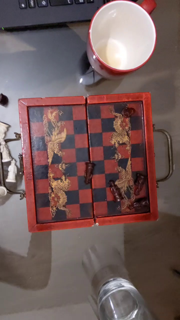

In [33]:
imgs = get_image_files(path/'images')
PILImage.create(imgs[0]).resize(size=(180, 320))

## Get annotations

In [34]:
import json
with open(path/'annotations'/'instances_default.json') as f:
  codes = json.load(f)

In [48]:
labels = dict((image['file_name'], anno['segmentation']) 
              for anno, image in zip(codes['annotations'], codes['images']))
codes['annotations']

[{'area': 228400.0,
  'attributes': {'occluded': False},
  'bbox': [42.78, 384.51, 615.9, 526.31],
  'category_id': 1,
  'id': 1,
  'image_id': 1,
  'iscrowd': 0,
  'segmentation': [[121.17,
    384.51,
    658.68,
    500.22,
    505.64,
    910.82,
    42.78,
    845.5]]},
 {'area': 224973.0,
  'attributes': {'occluded': False},
  'bbox': [111.22, 353.06, 586.34, 605.01],
  'category_id': 1,
  'id': 2,
  'image_id': 2,
  'iscrowd': 0,
  'segmentation': [[296.3,
    353.06,
    697.56,
    521.03,
    542.03,
    958.07,
    111.22,
    908.3]]},
 {'area': 205508.0,
  'attributes': {'occluded': False},
  'bbox': [30.34, 398.17, 541.24, 606.56],
  'category_id': 1,
  'id': 3,
  'image_id': 3,
  'iscrowd': 0,
  'segmentation': [[224.75,
    398.17,
    571.58,
    572.36,
    440.94,
    1004.73,
    30.34,
    954.96]]},
 {'area': 208541.0,
  'attributes': {'occluded': False},
  'bbox': [117.44, 421.5, 602.56, 552.12],
  'category_id': 1,
  'id': 4,
  'image_id': 4,
  'iscrowd': 0,
  '

In [36]:
def get_label(f):
  points = labels[f.name][0]
  return tensor(list(zip(points[::2], points[1::2])))

In [ ]:
get_label(path/'images'/'frame80.jpg')
#labels
codes

## Datablock API

In [43]:
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_label,
    #item_tfms=Resize(320),
    batch_tfms=[Normalize.from_stats(*imagenet_stats)]
)

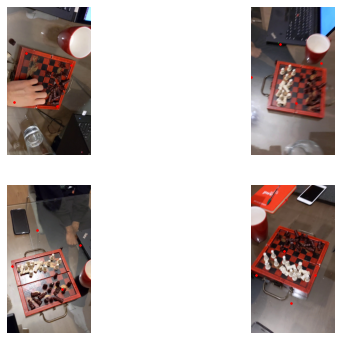

In [45]:
dls = biwi.dataloaders(path, bs=4)
dls.show_batch(max_n=9, figsize=(8,6))

## Train

In [40]:
learn = cnn_learner(dls, resnet18, y_range=(-1,1))

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=1.2022644114040304e-05)

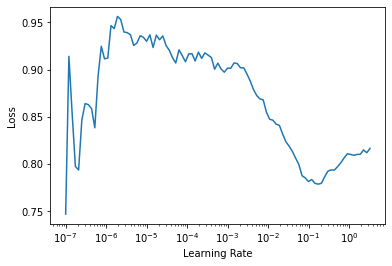

In [41]:
learn.lr_find()

In [42]:
learn.fine_tune(3, 10e-3)

epoch,train_loss,valid_loss,time
0,0.915388,None,00:00


KeyError: ignored

In [ ]:
learn.show_results()

NameError: ignored